IA & Data science (LU3IN026) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


## Projet 2021

### Préparation du notebook


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

    MISTRY Manishkumar
    ERGUN Yavuz

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2021</tt> et rajouter à la suite de <tt>projet-2021</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `projet2021-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

## Données

Les données vous sont fournies sur le moodle. 
Ces données sont fournies sur Kaggle, ce sont les données *Google Play Store Apps* accessibles à l'adresse https://www.kaggle.com/lava18/google-play-store-apps.

Il est indispensable de lire en détail la page Kaggle pour comprendre à quoi ces données correspondent.

Le compte-rendu a fournir le jour de la dernière séance de TDTME de votre groupe doit comporter:
- un fichier PDF qui correspond à un poster sur lequel sont expliqués les différents problèmes traités, la façon dont ils ont été traités, et les résultats obtenus.
- un notebook par problème traité, vous pouvez traiter autant de problème que vous le souhaitez. Le problème étudié doit être décrit précisément et vous devez impérativement suivre le format ci-dessous.

Bien entendu, le tout sera mis dans un fichier archive (tar.gz ou zip exclusivement) et déposé sur le site Moodle.


Format à suivre:

## Partie 1 - Description du problème

Nous sommes 2 jeunes étudiants nécessitant des fonds pour mener à bien nos études et nos projets. 
Nous avons eu la bonne idée de crée une application qui nous rendra riche.
Le problème c'est qu'on ne sait pas quel genre d'application, si elle doit être payante ou non et a qu'elle audience elle doit être destiné.
La ressource à notre disposition est une base de données des différentes applications du google Play store et un bd des reviews deposé sur ces applications. 


## Partie 2 - Modèle

Nous allons donc utiliser un modèle d'apprentissage non supervisé basé sur l’algorithme des k-moyenne développer durant le TME 8, qui va donc nous aiguiller sur une direction à suivre pour définir les caractéristiques de notre application.

        -K-Moyenne: Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de                    regrouper les données “similaires” en groupes

## Partie 3 - Code

Les codes des différentes fonctions utiliser dans se notebook sont dans fichiers .py dans le dossier iads.

    utils.py : librairie d'utilité

    -normalisation(X):
    -affiche_resultat(data, centroides, affectation):

    kmeans.py : librairie du k-moyenne 
        -kmoyennes(k, base, epsilon, iter_max=100, affiche=False):
        -Toute les fonctions dont kmoyennes depend fait durant le TME 8

    evaluation.py : librairie d'evaluation du k-moyenne 
        -dist_intracluster(base):
        -global_intraclusters(base, affectation):
        -sep_clusters(centres):
        -evaluation(base, centres, affectation):

## Importation des librairies

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads
from iads import Classifiers as cl
from iads import Kmeans as km
from iads import evaluation as ev
from iads import utils as ut

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Chargement des données

Dans notre base de données ont aura des valeurs redondante comme:
    -Nan
    -des valeurs manquantes dans certaine colonne
    -caractères spéciaux
    -valeurs quelconque
Ils seront résolue un par un.

In [2]:
gdata=pd.read_csv('googleplaystore.csv')
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
gdata.shape

(10841, 13)

Il y a 10841 rows et 13 colonne dans le dataset

In [4]:
gdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
gdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


On va utiliser isnull() pour détecter les valeurs manqantes.

In [6]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
gdata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Il y a des valeurs manquantes dans les attributs comme:
    -Rating
    -Type
    -Content Rating
    -Current Ver
    -Android Ver

# Nettoyage de la Data

In [8]:
gdata=gdata.dropna()

In [9]:
def removing_postfix_and_prefix(column):
    column = column.str.replace('+', '')
    column = column.str.replace(',', '')
    column = column.str.replace('$', '')
    column = column.str.replace("'", '')
    return column

## Nettoyage de Installs

In [10]:
gdata['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [11]:
gdata['Installs'] = removing_postfix_and_prefix(gdata['Installs'])
gdata['Installs'].unique()

<ipython-input-9-538a215abe24>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  column = column.str.replace('+', '')
<ipython-input-9-538a215abe24>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  column = column.str.replace('$', '')


array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [12]:
gdata['Installs'] = pd.to_numeric(gdata['Installs'])
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1023.8+ KB


Notre colonne INSTALL est prête pour analyse

## Nettoyage de Rating

In [14]:
gdata[pd.isnull(gdata['Rating'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
#Les valeurs NaN sont remplacer par la valeur moyenne de l'évaluation
gdata['Rating'].fillna(value=gdata['Rating'].mean(),inplace=True)
gdata['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [16]:
gdata['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Ici on constate que la dernière valeur n'est pas cohérente

In [17]:
gdata['Rating'].replace(19., 4.1, inplace=True)
gdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1023.8+ KB


Notre colonne RATING est prête pour analyse

## Nettoyage de Reviews

In [18]:
gdata['Reviews'] = gdata['Reviews'].astype(int)

## Nettoyage de Size

In [19]:
gdata['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [20]:
trash_data = gdata[gdata['Size'] == "Varies with device"]
gdata.drop(trash_data.index, inplace=True)

In [21]:
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
gdata.shape

(7723, 13)

In [23]:
size_data = gdata['Size'].loc[gdata['Size'].str.contains('k')].index.tolist()
convert_data = pd.DataFrame(gdata.loc[size_data, 'Size'].apply(lambda x : x.strip('k')).astype(float).apply(lambda x : x/1024).apply(lambda x : round(x, 3)).astype(str))
gdata.loc[size_data, 'Size'] = convert_data

gdata['Size'] = gdata['Size'].apply(lambda x:x.strip('M'))
gdata['Size'] = gdata['Size'].astype(float)

In [24]:
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Notre colonne Size est prête pour l'analyse

## Nettoyage de Price

In [25]:
gdata['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [26]:
gdata['Price'] = removing_postfix_and_prefix(gdata['Price'])
gdata['Price'].unique()

<ipython-input-9-538a215abe24>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  column = column.str.replace('+', '')
<ipython-input-9-538a215abe24>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  column = column.str.replace('$', '')


array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [27]:
gdata['Price'] = gdata['Price'].astype(float)
gdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int32  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 1.0+ MB


La colonne Price est prête pour l'analyse

In [28]:
#on enleve les doublons
gdata=gdata.drop_duplicates(subset='App', keep="first")

In [29]:
gdata = gdata.reset_index(drop=True)
gdata_copy = gdata
gdata

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.604,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
7019,FR Calculator,FAMILY,4.0,7,2.600,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
7020,Sya9a Maroc - FR,FAMILY,4.5,38,53.000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
7021,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [30]:
gdata = gdata.drop(['App', 'Type', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis='columns')
gdata

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19.000,10000,0.0,Everyone
1,ART_AND_DESIGN,3.9,967,14.000,500000,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.700,5000000,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644,25.000,50000000,0.0,Teen
4,ART_AND_DESIGN,4.3,967,2.800,100000,0.0,Everyone
...,...,...,...,...,...,...,...
7018,BOOKS_AND_REFERENCE,4.8,44,0.604,1000,0.0,Everyone
7019,FAMILY,4.0,7,2.600,500,0.0,Everyone
7020,FAMILY,4.5,38,53.000,5000,0.0,Everyone
7021,FAMILY,5.0,4,3.600,100,0.0,Everyone


In [31]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        7023 non-null   object 
 1   Rating          7023 non-null   float64
 2   Reviews         7023 non-null   int32  
 3   Size            7023 non-null   float64
 4   Installs        7023 non-null   int64  
 5   Price           7023 non-null   float64
 6   Content Rating  7023 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 356.8+ KB


In [32]:
gdata.iloc[:,1:6].dtypes

Rating      float64
Reviews       int32
Size        float64
Installs      int64
Price       float64
dtype: object

In [33]:
df = gdata.iloc[:,1:6]
df

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19.000,10000,0.0
1,3.9,967,14.000,500000,0.0
2,4.7,87510,8.700,5000000,0.0
3,4.5,215644,25.000,50000000,0.0
4,4.3,967,2.800,100000,0.0
...,...,...,...,...,...
7018,4.8,44,0.604,1000,0.0
7019,4.0,7,2.600,500,0.0
7020,4.5,38,53.000,5000,0.0
7021,5.0,4,3.600,100,0.0


In [34]:
df_norm = ut.normalisation(df)
data_desc_norm = np.asarray(df_norm)
data_desc_norm

array([[7.75000000e-01, 3.51957985e-06, 1.89935195e-01, 9.99900001e-06,
        0.00000000e+00],
       [7.25000000e-01, 2.15184439e-05, 1.39931194e-01, 4.99999000e-04,
        0.00000000e+00],
       [9.25000000e-01, 1.94933489e-03, 8.69269542e-02, 4.99999900e-03,
        0.00000000e+00],
       ...,
       [8.75000000e-01, 8.24205407e-07, 5.29962397e-01, 4.99900000e-06,
        0.00000000e+00],
       [1.00000000e+00, 6.68274654e-08, 3.59228738e-02, 9.90000001e-08,
        0.00000000e+00],
       [8.75000000e-01, 8.87259348e-03, 1.89935195e-01, 9.99999901e-03,
        0.00000000e+00]])

## Partie 4 - Protocole expérimental

In [35]:
# eval marche pas comme il faut a revoir
# maxK = 15
# Min = -1
# optiK = 0
# stat = []
# x=[]
    
# for i in range(2,maxK) :
#     x.append(i)
#     print("K =", i,"...")
#     c, a = km.kmoyennes(i, data_desc_norm, 0.05, 100, True)
#     indice = ev.evaluation(data_desc_norm,c,a)
    
#     if Min == -1 or indice < Min:
#         Min = indice
#         optiK = i
#         optiCenters = c
#         optiAffect = a
    
#     stat.append(indice)

##################################################
# print("K optimal :", optiK)

# fig, ax1 = plt.subplots(figsize=(10,5))
# ax1.plot(x, stat, "g-o")

# ax1.set_xlabel('K')
# ax1.set_ylabel('indice');
# plt.title('Evolution en fonction de K')
# plt.show()

# plt.figure()

##################################################

# xinit = []
# inertie_list = []
# for i in range(2,30):
#     print("K =", i,"...")
#     centres, affectation, inertie = km.kmoyennes(i, data_desc_norm, 0.05, 100)
#     xinit.append(i)
#     inertie_list.append(inertie)

##################################################

# fig, ax1 = plt.subplots(figsize=(10,5))
# ax1.plot(xinit, inertie_list, "g-o")

# ax1.set_xlabel('Nombre de cluster')
# ax1.set_ylabel('Inertie');
# plt.title("Evolution de l'inertie en fonction du nombre de cluster K")
# plt.show()

# plt.figure()
    

On cherche d'abord une quelconque corrélation dans notre base de données

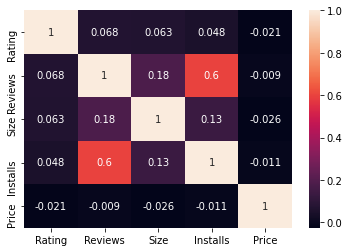

In [36]:
sns.heatmap(gdata.corr(), annot=True)
plt.show()

On en trouve une assez forte corrélation entre le nombre d'installations et les reviews.
Allons voir ça de plus près

## Relation entre Reviews et Installs

In [37]:
df2 = df.drop(['Rating','Size','Price'], axis='columns')
df2_norm = ut.normalisation(df2)
data_desc_norm2 = np.asarray(df2_norm)
data_desc_norm2

array([[3.51957985e-06, 9.99900001e-06],
       [2.15184439e-05, 4.99999000e-04],
       [1.94933489e-03, 4.99999900e-03],
       ...,
       [8.24205407e-07, 4.99900000e-06],
       [6.68274654e-08, 9.90000001e-08],
       [8.87259348e-03, 9.99999901e-03]])

Avant de lancer l'algorithme des k-moyenne, il nous faut d'abord le nombre de cluster idéal.
Ce nombre doit être assez grand pour avoir une inertie minimum tout en restant assez petit.
On va donc utiliser la méthode du coude pour trouver un K optimal

In [60]:
xinit = []
inertie_list = []
for i in range(2,10):
    print("K =", i,"...")
    centres, affectation, inertie = km.kmoyennes(i, data_desc_norm2, 0.05, 100)
    xinit.append(i)
    inertie_list.append(inertie)
    

K = 2 ...
K = 3 ...
K = 4 ...
K = 5 ...
K = 6 ...
K = 7 ...
K = 8 ...
K = 9 ...


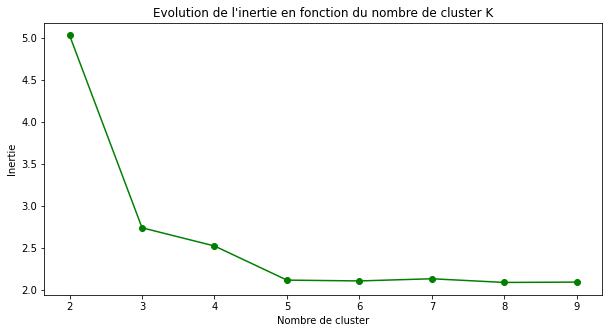

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [61]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(xinit, inertie_list, "g-o")

ax1.set_xlabel('Nombre de cluster')
ax1.set_ylabel('Inertie');
plt.title("Evolution de l'inertie en fonction du nombre de cluster K")
plt.show()

plt.figure()

D’après le graphique de l'évolution de l'inertie en fonction du nombre de cluster K
5 serait notre K optimal

In [62]:
centres, affectation, inertie = km.kmoyennes(5, data_desc_norm2, 0.05, 100, affiche=True)

Sélectionnés:  [[1.0692394468628314e-06, 9.999000009999e-06], [0.0005554476168234312, 0.004999999004999999], [4.481895348100035e-05, 9.9999000099999e-05], [2.227582180964232e-07, 9.99000000999e-07], [4.9452324417405956e-06, 4.9999000049999e-05]]
iteration  0 Inertie : 8.00822812186173 Difference:  1.4082303919871126
iteration  1 Inertie : 6.599997729874618 Difference:  0.9125349896490151
iteration  2 Inertie : 5.687462740225603 Difference:  0.5536553229657075
iteration  3 Inertie : 5.133807417259895 Difference:  0.23167485375440222
iteration  4 Inertie : 4.902132563505493 Difference:  0.28128271226080237
iteration  5 Inertie : 4.6208498512446905 Difference:  0.4459533381863796
iteration  6 Inertie : 4.174896513058311 Difference:  0.488710971463056
iteration  7 Inertie : 3.686185541595255 Difference:  0.33105028447130636
iteration  8 Inertie : 3.3551352571239486 Difference:  0.42204209704055495
iteration  9 Inertie : 2.9330931600833936 Difference:  0.33538071225172583
iteration  10 Iner

## Partie 5 - Résultats

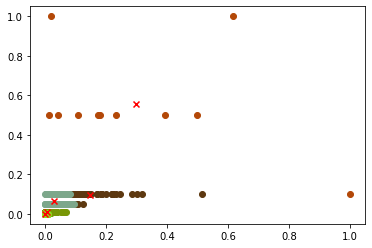

In [63]:
ut.affiche_resultat(data_desc_norm2, centres, affectation)

In [64]:
c0 = gdata.iloc[gdata.index[affectation[0]]]
c1 = gdata.iloc[gdata.index[affectation[1]]]
c2 = gdata.iloc[gdata.index[affectation[2]]]
c3 = gdata.iloc[gdata.index[affectation[3]]]
c4 = gdata.iloc[gdata.index[affectation[4]]]
list_cluster_df = [c0, c1, c2, c3,c4]
list_cluster = ["c0", "c1", "c2", "c3","c4"]

[9116071.42857143, 554545454.5454545, 95918367.34693877, 516528.3490534706, 65923566.87898089]


AttributeError: 'BarContainer' object has no attribute 'set_title'

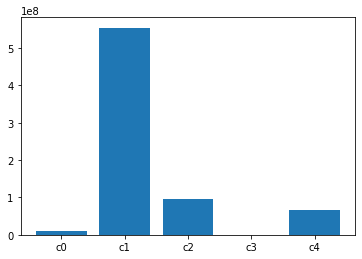

In [187]:
moy_install = []
for i in list_cluster_df:
    m = i['Installs'].mean()
    moy_install.append(i['Installs'].mean())
moy_install
best_cluster = list_cluster_df[np.argmax(moy_install)]
print(moy_install)
fig = plt.bar(list_cluster, moy_install)
fig.set_title("Moyenne d'installations des applications par cluster")

[315266.9349489796, 13377567.363636363, 7036813.040816327, 10571.212221853204, 1368095.203821656]


<BarContainer object of 5 artists>

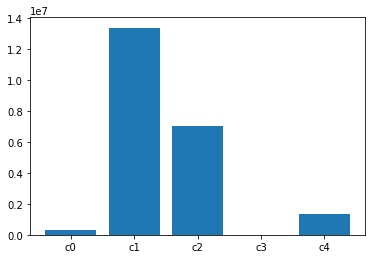

In [189]:
moy_reviews = []
for i in list_cluster_df:
    moy_reviews.append(i['Reviews'].mean())
moy_reviews
print(moy_reviews)
plt.bar(list_cluster, moy_reviews)

## Cluster 0

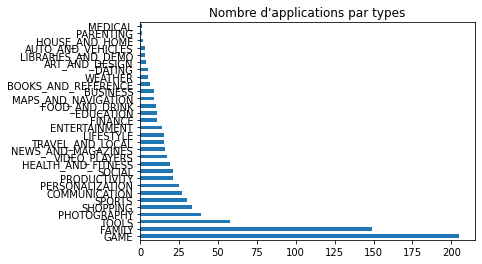

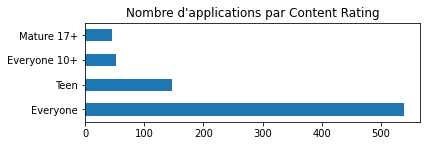

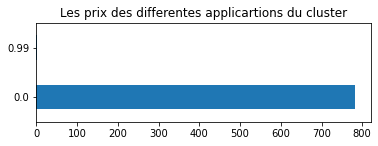

In [139]:
fig1 = c0['Category'].value_counts().plot(kind='barh').set_title("Nombre d'applications par types")
plt.show()
plt.subplot(2,1,1)
fig2 = c0['Content Rating'].value_counts().plot(kind='barh').set_title("Nombre d'applications par Content Rating")
plt.show()
plt.subplot(2,1,1)
fig3 = c0['Price'].value_counts().plot(kind='barh').set_title("Les prix des differentes applicartions du cluster")

## Cluster 1

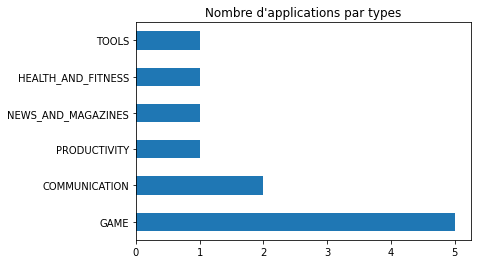

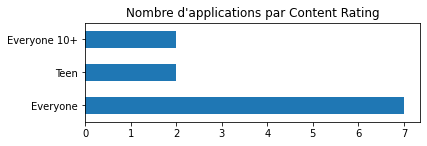

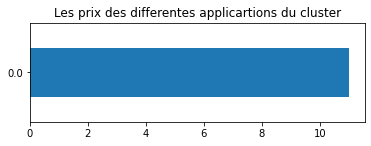

In [136]:
fig1 = c1['Category'].value_counts().plot(kind='barh').set_title("Nombre d'applications par types")
plt.show()
plt.subplot(2,1,1)
fig2 = c1['Content Rating'].value_counts().plot(kind='barh').set_title("Nombre d'applications par Content Rating")
plt.show()
plt.subplot(2,1,1)
fig3 = c1['Price'].value_counts().plot(kind='barh').set_title("Les prix des differentes applicartions du cluster")

## Cluster 2

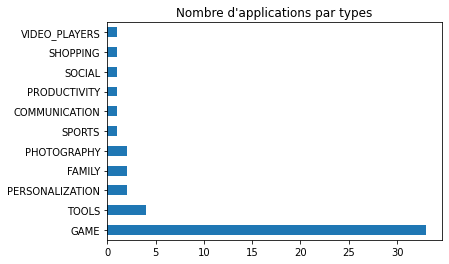

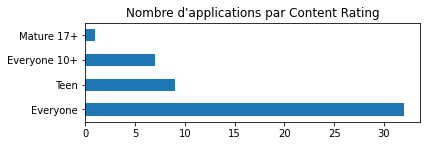

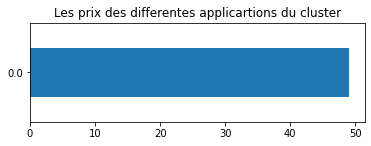

In [142]:
fig1 = c2['Category'].value_counts().plot(kind='barh').set_title("Nombre d'applications par types")
plt.show()
plt.subplot(2,1,1)
fig2 = c2['Content Rating'].value_counts().plot(kind='barh').set_title("Nombre d'applications par Content Rating")
plt.show()
plt.subplot(2,1,1)
fig3 = c2['Price'].value_counts().plot(kind='barh').set_title("Les prix des differentes applicartions du cluster")

## Cluster 3

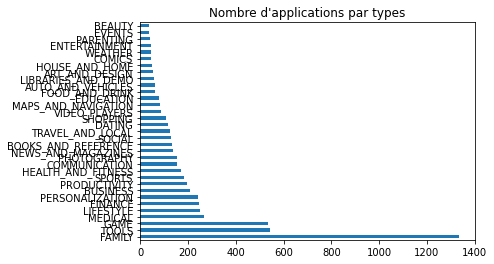

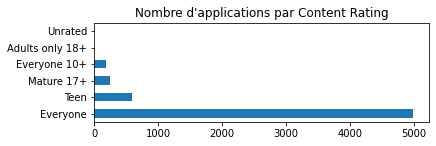

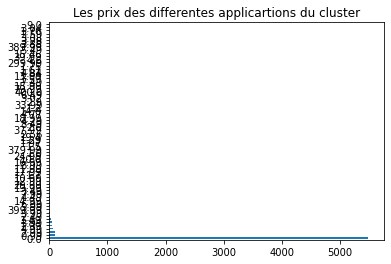

In [133]:
fig1 = c3['Category'].value_counts().plot(kind='barh').set_title("Nombre d'applications par types")
plt.show()
plt.subplot(2,1,1)
fig2 = c3['Content Rating'].value_counts().plot(kind='barh').set_title("Nombre d'applications par Content Rating")
plt.show()
plt.subplot(1,1,1)
fig3 = c3['Price'].value_counts().plot(kind='barh').set_title("Les prix des differentes applicartions du cluster")

## Cluster 4


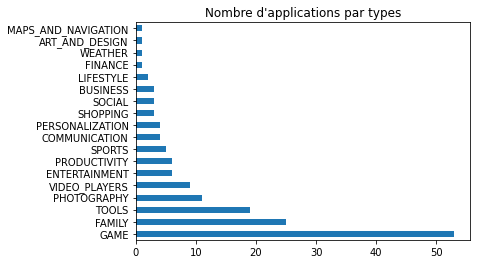

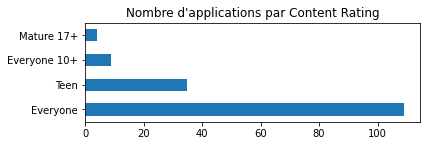

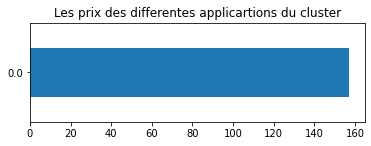

In [124]:
fig1 = c4['Category'].value_counts().plot(kind='barh').set_title("Nombre d'applications par types")
plt.show()
plt.subplot(2,1,1)
fig2 = c4['Content Rating'].value_counts().plot(kind='barh').set_title("Nombre d'applications par Content Rating")
plt.show()
plt.subplot(2,1,1)
fig3 = c4['Price'].value_counts().plot(kind='barh').set_title("Les prix des differentes applicartions du cluster")

Après une rapide visualisation des clusters on remarque plusieurs choses :
Le cluster 0 regroupe les applications qui on moyennement marcher, avec un taux d'installation proche des 10000000.
Le cluster 1 lui regroupe les applications qui ont le mieux marcher du store entre autres in retrouve des taux d'installation entre 1000000000 et 500000000 et on en compte seulement 11.
Le cluster 2 regroupe une trentaine d'app qui ont tous biens marcher dans les alentours des 100000000 d'installation
Le cluster 3 est très chargé, il regroupe les applications ayant pas très bien fonctionner au sens des installation ce qui nous est donc pas très utile.
Enfin pour le cluster 4 on retrouve des scores à peu près similaires au 2 cependant il y a beaucoup plus d'individu ce qui fais ce cluster reste moins bien que le 2.
De plus le grand nombre d'installation et de review des application des cluster 1 et 2 nous garantissent que les ratings sont fiable comparer aux autres cluster ayant des faible quantité de review.
On retrouve à donc 2 clusters qui nous intéresse.

## Partie 6 - Analyse

In [147]:
c2

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
231,COMMUNICATION,4.3,4187998,16.0,100000000,0.0,Everyone
959,GAME,4.5,4447388,67.0,100000000,0.0,Everyone 10+
965,GAME,4.6,23133508,97.0,100000000,0.0,Everyone 10+
971,GAME,4.4,4066989,69.0,100000000,0.0,Everyone 10+
972,GAME,4.5,3778921,75.0,100000000,0.0,Everyone
973,GAME,4.4,6198563,67.0,100000000,0.0,Everyone
979,GAME,4.5,14198297,52.0,100000000,0.0,Everyone
983,GAME,4.4,5566669,97.0,100000000,0.0,Everyone
988,GAME,4.4,8923587,63.0,100000000,0.0,Everyone
992,GAME,4.4,7614130,70.0,100000000,0.0,Everyone


In [58]:
best_cluster

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
233,COMMUNICATION,4.3,4785892,11.0,500000000,0.0,Everyone
247,COMMUNICATION,4.5,17712922,40.0,500000000,0.0,Teen
960,GAME,4.5,27722264,76.0,1000000000,0.0,Everyone 10+
961,GAME,4.4,22426677,74.0,500000000,0.0,Everyone
966,GAME,4.3,8118609,62.0,500000000,0.0,Everyone
967,GAME,4.3,10485308,24.0,500000000,0.0,Everyone
975,GAME,4.6,44891723,98.0,100000000,0.0,Everyone 10+
1828,TOOLS,4.6,7790693,17.0,500000000,0.0,Everyone
1974,PRODUCTIVITY,4.4,1861310,61.0,500000000,0.0,Everyone
2116,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,0.0,Teen


In [184]:
c2bis = c2.where(c2['Category']=="GAME").dropna()
c2bis.index.values.tolist()
c2games = gdata_copy.loc[c2bis.index.values.tolist()]
c2games

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
959,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
965,Clash Royale,GAME,4.6,23133508,97.0,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
971,Plants vs. Zombies FREE,GAME,4.4,4066989,69.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 6, 2018",2.2.00,4.1 and up
972,Sonic Dash,GAME,4.5,3778921,75.0,100000000,Free,0.0,Everyone,Arcade,"July 26, 2018",3.8.5.Go,4.1 and up
973,Candy Crush Soda Saga,GAME,4.4,6198563,67.0,100000000,Free,0.0,Everyone,Casual,"July 10, 2018",1.118.4,4.1 and up
979,8 Ball Pool,GAME,4.5,14198297,52.0,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
983,Angry Birds Classic,GAME,4.4,5566669,97.0,100000000,Free,0.0,Everyone,Arcade,"May 24, 2018",7.9.3,4.1 and up
988,Hill Climb Racing,GAME,4.4,8923587,63.0,100000000,Free,0.0,Everyone,Racing,"July 2, 2018",1.37.2,4.2 and up
992,Farm Heroes Saga,GAME,4.4,7614130,70.0,100000000,Free,0.0,Everyone,Casual,"July 26, 2018",5.1.8,2.3 and up
994,My Talking Angela,GAME,4.5,9881829,99.0,100000000,Free,0.0,Everyone,Casual,"July 3, 2018",3.7.2.51,4.1 and up


In [190]:
c2games["Genres"].value_counts()

Arcade                          8
Action                          7
Casual                          5
Racing                          4
Strategy                        3
Sports                          3
Adventure                       1
Adventure;Action & Adventure    1
Trivia                          1
Name: Genres, dtype: int64

On observe qu'au niveau du genre des jeux 
les genres Action, Arcade, casual revienne le plus.
Donc notre jeu sera d'un de ces 3 genres.

In [182]:
c1bis = c1.where(c1['Category']=="GAME").dropna()
c1bis.index.values.tolist()
bestgames = gdata_copy.loc[c1bis.index.values.tolist()]
bestgames

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
960,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
961,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
966,Temple Run 2,GAME,4.3,8118609,62.0,500000000,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
967,Pou,GAME,4.3,10485308,24.0,500000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
975,Clash of Clans,GAME,4.6,44891723,98.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


Plus précisément notre jeu visera la globalité des utilisateurs et sera gratuit,
De plus casiment toute ces applications possèdent des achats in app, ce qui serais donc le modèle économique a suivre.
Il faudrait a present chercher dans la base de données des reviews pour essayer d'isoler les raisons pour lequelles ces applications on etait autant adoré,
afin de ciblé plus précisément le contenue du jeu.